Problem statement:

Given the data of citizens, we have to understand the data extensively, perform EDA to better understand the features and predict if an individual's income is above 50k or no by using the relevant features


Importing the necessary libraries

In [46]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [47]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [48]:
df= pd.read_csv('../../data/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [49]:
df.shape

(32561, 15)

In [50]:
#Mapping binary values to the expected output

df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [51]:
#Replacing question marks in dataset with null values

df.replace('?',np.nan )

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [52]:
#Finding what percentage of data is missing from the dataset

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
income,0,0.0
native.country,0,0.0
hours.per.week,0,0.0
capital.loss,0,0.0
capital.gain,0,0.0


In [53]:
#Since a very small amount of data is missing, we can replace the null values with the mode of each column

df['occupation'].describe()

count              32561
unique                15
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [54]:
#Since mode is Prof-specialty, replacing null values with it

df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [55]:
df['workclass'].describe()

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

In [56]:
#Since mode is Private, replacing null values with it

df['workclass'] = df['workclass'].fillna('Private')

In [57]:
df['native.country'].describe()

count             32561
unique               42
top       United-States
freq              29170
Name: native.country, dtype: object

In [58]:
#Since mode is United-States, replacing null values with it

df['native.country'] = df['native.country'].fillna('United-States')

In [59]:
#Mean, Median, Minimum , Maximum values etc can be found

df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [60]:
df.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

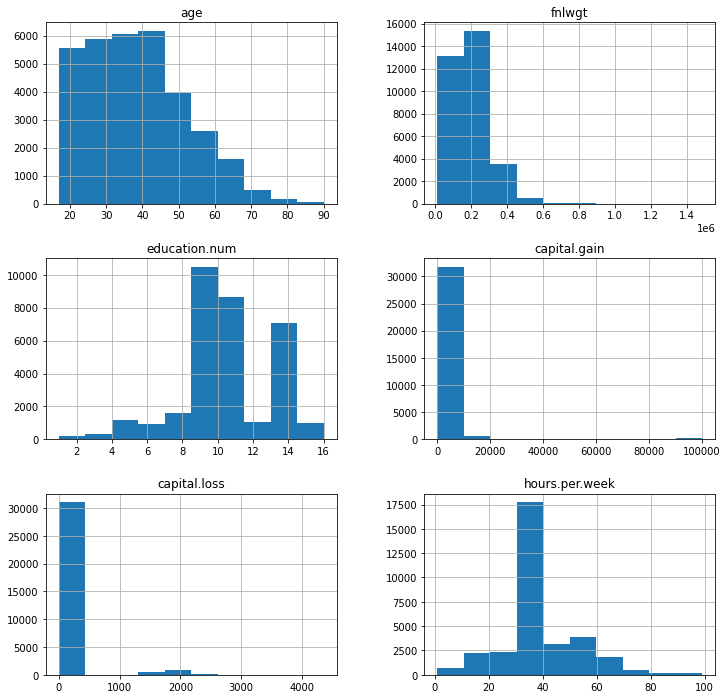

In [61]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()

#Can visualise that data such as capital gain, capitaln loss, fnlwgt is right skewed an other columns can be grouped for better visualisation

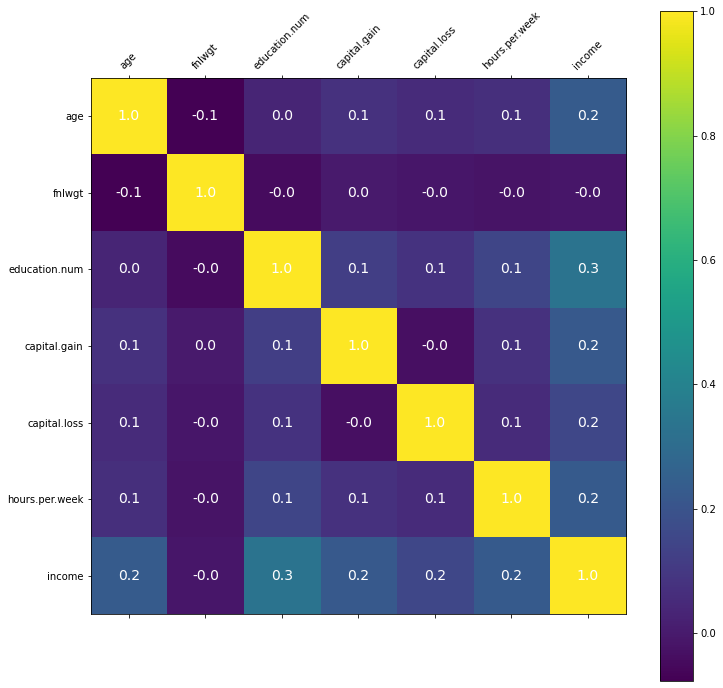

In [62]:
#Ploting the correlation between the output(income) and individual features

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)


In [63]:
#Since it has 0 correlation, it can be dropped

df.drop(['fnlwgt'], axis = 1, inplace = True)

In [64]:
dataset=df.copy()

In [65]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

<AxesSubplot:xlabel='income', ylabel='count'>

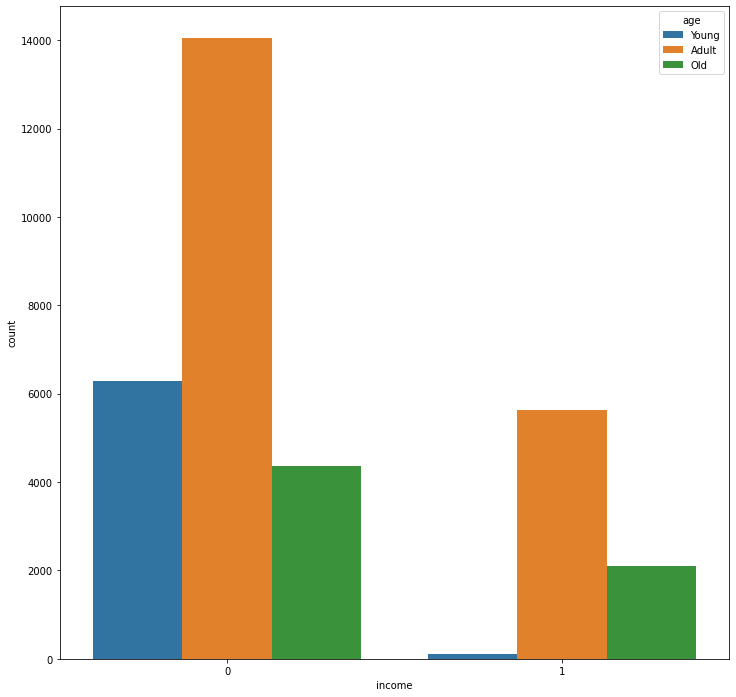

In [66]:
sns.countplot(x = 'income', hue = 'age', data = dataset)

In [67]:
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income

dataset['Capital Diff'] = dataset['capital.gain'] - dataset['capital.loss']
dataset.drop(['capital.gain'], axis = 1, inplace = True)
dataset.drop(['capital.loss'], axis = 1, inplace = True)

<AxesSubplot:xlabel='income', ylabel='count'>

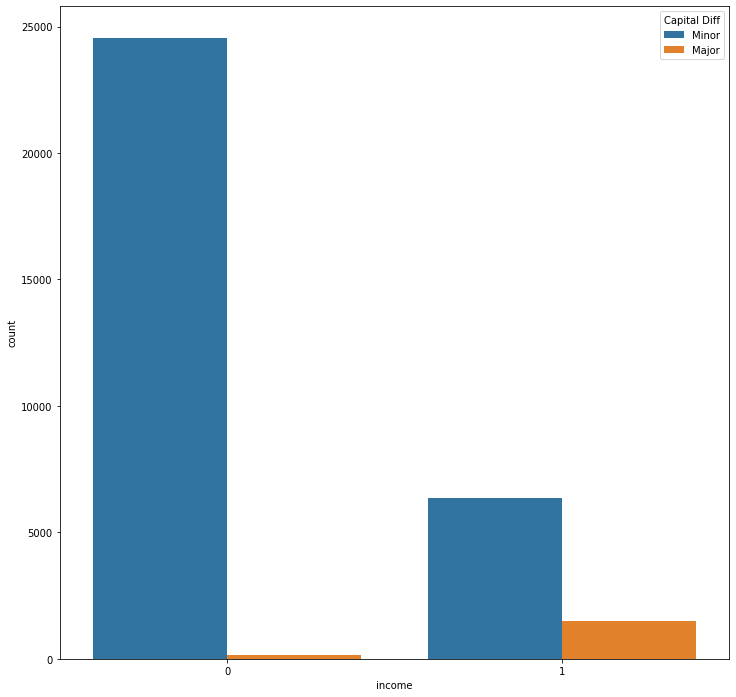

In [68]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'income', hue = 'Capital Diff', data = dataset)

In [69]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income

dataset['Hours per Week'] = pd.cut(dataset['hours.per.week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<AxesSubplot:xlabel='income', ylabel='count'>

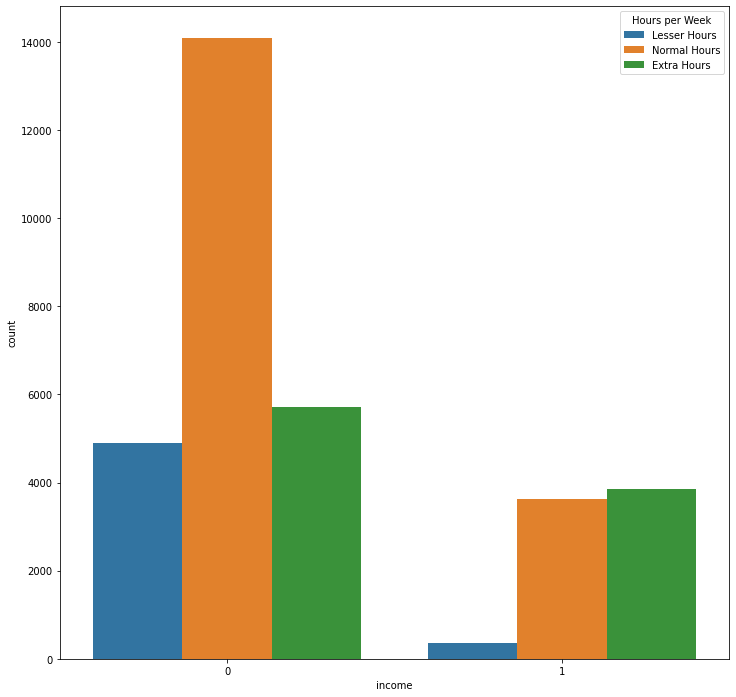

In [70]:
sns.countplot(x = 'income', hue = 'Hours per Week', data = dataset)


<AxesSubplot:xlabel='income', ylabel='count'>

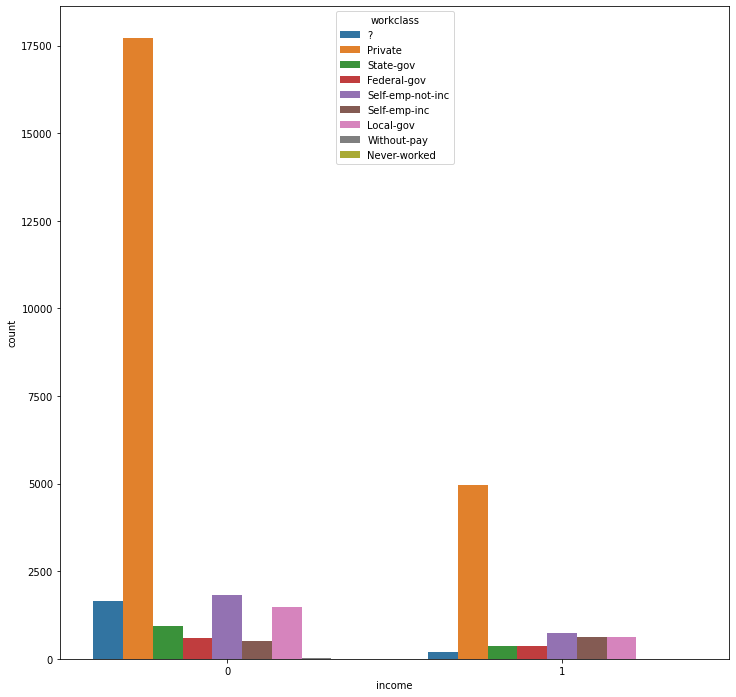

In [71]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'income', hue = 'workclass', data = dataset)

<AxesSubplot:xlabel='income', ylabel='count'>

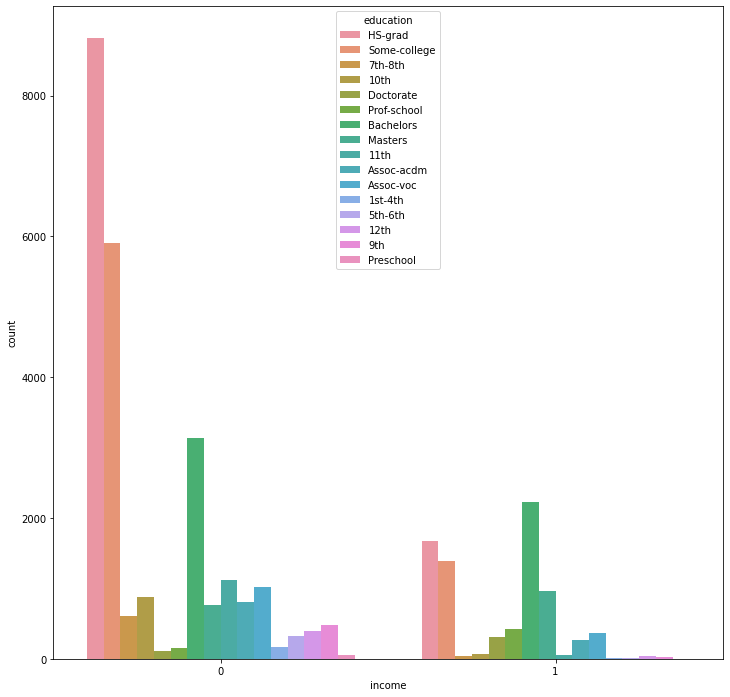

In [72]:
#Plot of education corresponding to income

sns.countplot(x = 'income', hue = 'education', data = dataset)

In [73]:
#Combining the lower grades of education together

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

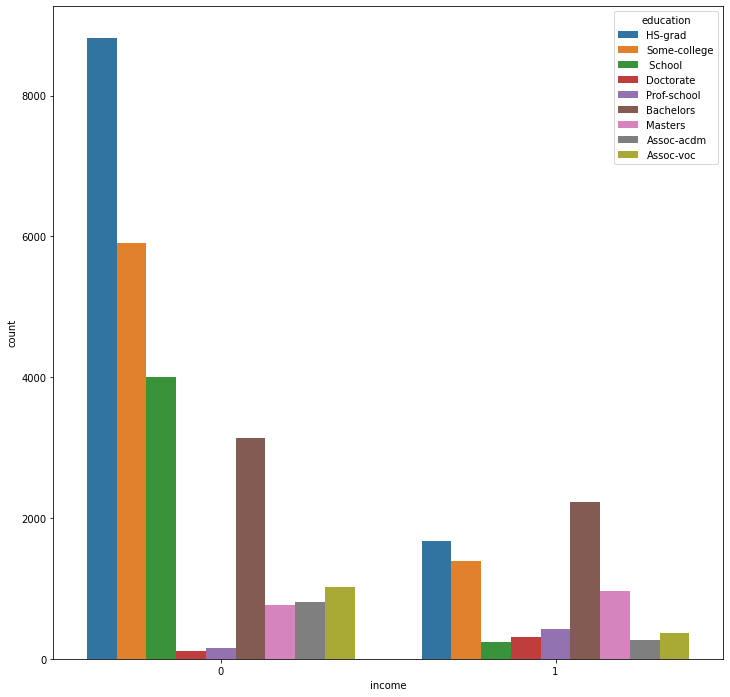

In [74]:
sns.countplot(x = 'income', hue = 'education', data = df)

<AxesSubplot:xlabel='income', ylabel='count'>

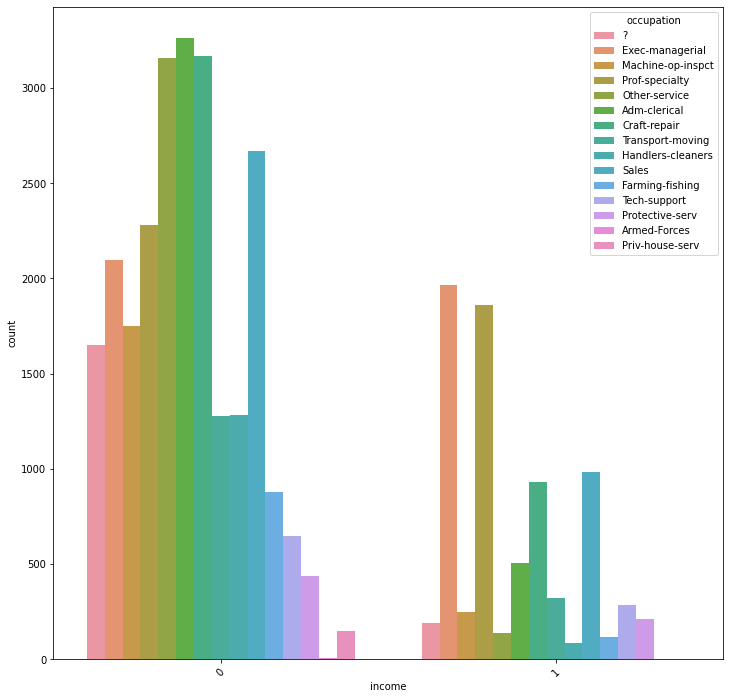

In [75]:
#Plot of occupation corresponding to the income

plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = dataset)

<AxesSubplot:xlabel='income', ylabel='count'>

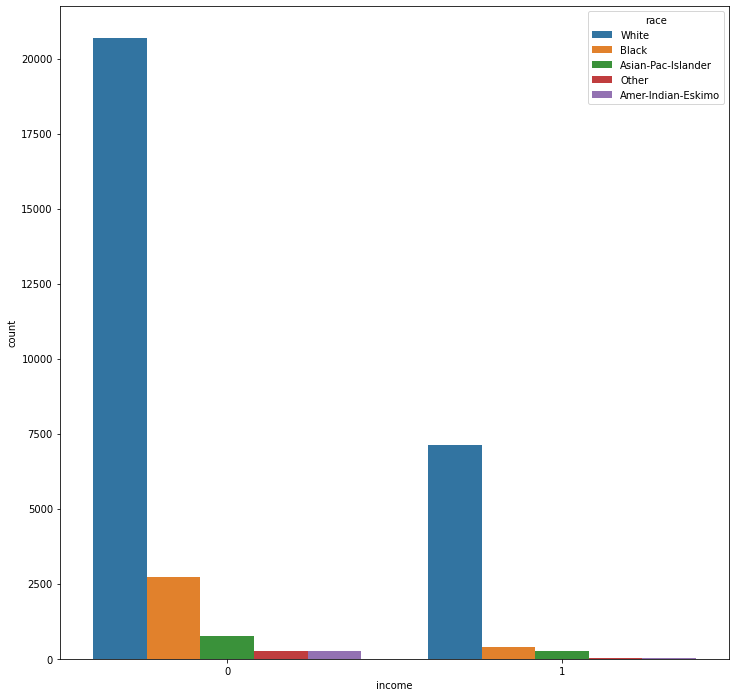

In [76]:
sns.countplot(x = 'income', hue = 'race', data = dataset)

In [77]:
#Since majority of race is white, the rest of races can be combined together to form a new group

df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

<AxesSubplot:xlabel='income', ylabel='count'>

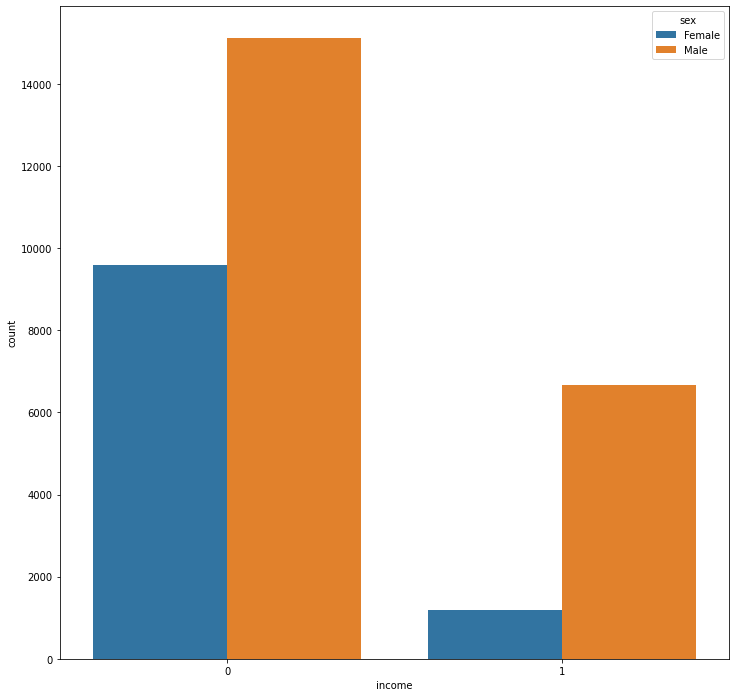

In [78]:
#Plot of sex corresponding to income

sns.countplot(x = 'income', hue = 'sex', data = dataset)

In [79]:
count = dataset['native.country'].value_counts()
count

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

Text(0.5, 1.0, 'Count from each Country')

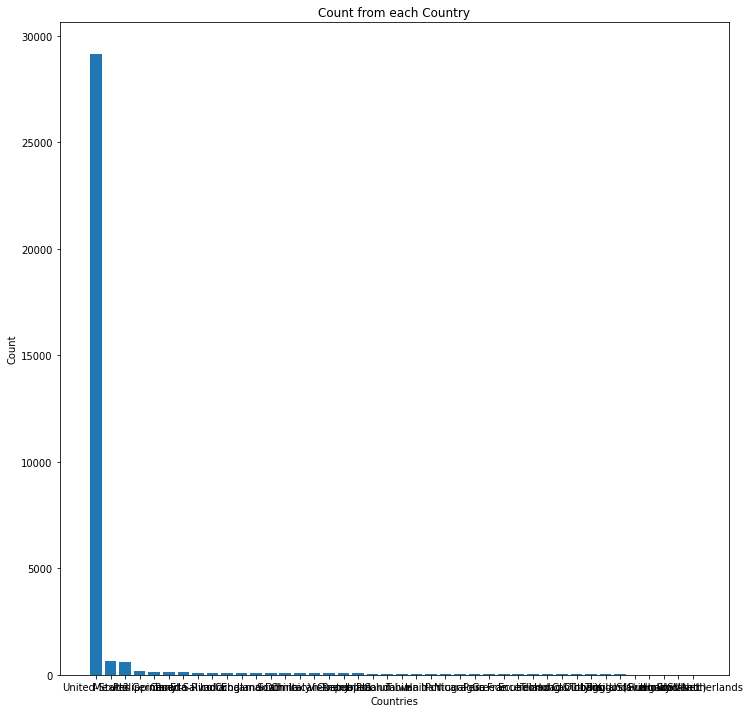

In [80]:
#Plot of Country corresponding to income


plt.bar(count.index, count.values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')

In [81]:
#Combining all other into one class

countries = np.array(dataset['native.country'].unique())
countries = np.delete(countries, 0)

In [82]:
dataset['native.country'].replace(countries, 'Other', inplace = True)
df['native.country'].replace(countries, 'Other', inplace = True)

<AxesSubplot:xlabel='native.country', ylabel='count'>

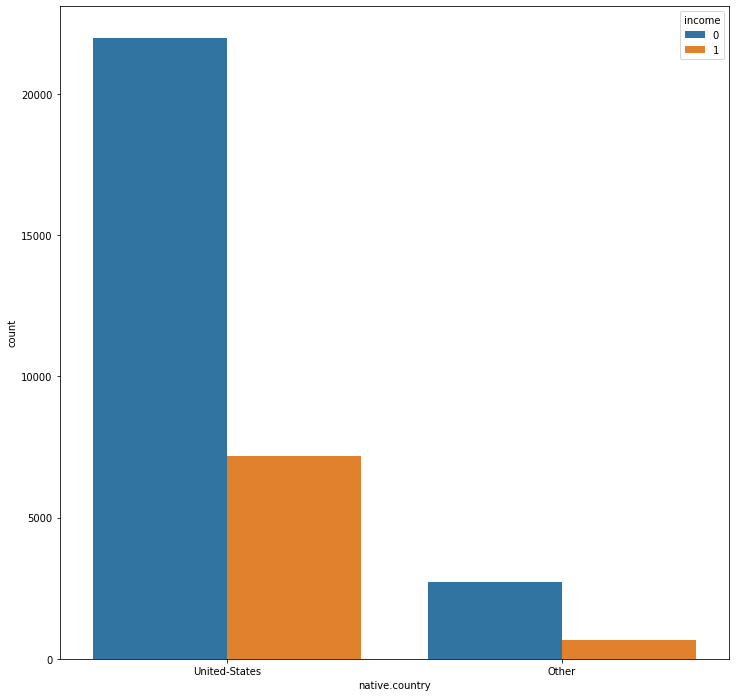

In [83]:
sns.countplot(x = 'native.country', hue = 'income', data = dataset)

In [84]:
#Splitting the data set into features and outcome

df['race'] = df['race'].apply(lambda x: 1 if x == "White" else 0)

X = df.drop(['income'], axis=1)
Y = df['income']


In [85]:
df = df[~(df == '?').any(axis=1)]
df

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,1,Female,0,4356,18,United-States,0
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,1,Female,0,3900,40,United-States,0
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,1,Female,0,3900,40,United-States,0
5,34,Private,HS-grad,Divorced,Other-service,Unmarried,1,Female,0,3770,45,United-States,0
6,38,Private,School,Separated,Adm-clerical,Unmarried,1,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,1,Male,0,0,40,United-States,0
32557,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,1,Female,0,0,38,United-States,0
32558,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,1,Male,0,0,40,United-States,1
32559,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,1,Female,0,0,40,United-States,0


In [86]:
X.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,?,HS-grad,Widowed,?,Not-in-family,1,Female,0,4356,40,United-States
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,1,Female,0,4356,18,United-States
2,66,?,Some-college,Widowed,?,Unmarried,0,Female,0,4356,40,United-States
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,1,Female,0,3900,40,United-States
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,1,Female,0,3900,40,United-States


In [87]:
#Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [88]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [44]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [45]:
X_train.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.134215,-0.577377,-0.402341,-0.600270,2.214196,0.412408,-1.430470,-0.145189,-0.217407,-1.662414,0.342505
1,0.028248,-1.279379,0.193090,-0.402341,0.109933,-0.899410,0.412408,0.699071,-0.145189,-0.217407,-0.200753,0.342505
2,0.247956,0.086059,1.348790,0.926666,-0.600270,-0.276689,0.412408,-1.430470,-0.145189,-0.217407,-0.038346,0.342505
3,-0.850587,-1.279379,0.193090,0.926666,-0.363535,0.968753,0.412408,0.699071,-0.145189,-0.217407,-0.038346,0.342505
4,-0.044989,-1.962098,0.578323,-0.402341,-0.600270,-0.899410,0.412408,0.699071,-0.145189,-0.217407,-0.038346,0.342505


In [ ]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
#Applying the GaussianNB algorithm

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [ ]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


In [ ]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

In [ ]:
#Finding significance of each feature in t5he best fit model

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

In [ ]:
#Plotting the significance of each feautre

importances.plot.bar()

In [ ]:
#Since they hardly have any significance, can drop these columns to avoid overfitting

df  = df.drop("sex", axis=1)
df  = df.drop("race", axis=1)
df  = df.drop("native.country", axis=1)

In [ ]:
#The accuracy remains the same even after dropping the columns

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Thus, in this project, we cleaned the data, carried out EDA extensively and understood all the parameters in this process and successfully applied multiple classification algorithms to predict the required output!

In [97]:
X_train

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32098,40,7,3,2,4,5,1,0,0,0,20,1,0
25206,39,2,5,2,7,0,1,1,0,0,38,1,1
23491,42,4,8,4,4,1,1,0,0,0,40,1,0
12367,27,2,5,4,5,3,1,1,0,0,40,1,0
7054,38,1,6,2,4,0,1,1,0,0,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,90,6,8,2,5,0,1,1,0,0,40,1,0
19648,36,4,5,2,14,0,1,1,0,0,40,1,0
9845,26,4,0,4,12,2,0,1,0,0,51,1,0
10799,44,4,6,2,4,0,1,1,0,0,40,1,1


## Fairness

In [98]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [99]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [100]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [96]:
X_train['income'] = Y_train


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [63]:
def custom_preprocessing(df):
        def group_race(x):
            if x == "White":
                return 1.0
            else:
                return 0.0
        # Recode sex and race
        df['sex'] = df['sex'].replace({'Female': 0.0, 'Male': 1.0})
        df['race'] = df['race'].apply(lambda x: group_race(x))

        return df

In [101]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = StandardDataset(X_train,
                                  label_name='income',
                                  protected_attribute_names=['sex'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [102]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.195109


In [103]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 100

model = RandomForestClassifier(n_estimators=100)


mdl = model.fit(X_train, y_train)
with open('../../Results/RF/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/RF/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/RF/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [104]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = RandomForestClassifier(n_estimators=i)
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [105]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/RF/' + nb_fname + '.csv')
final_result

      0         1         2         3         4         5
0     1 -0.178211 -0.075223  0.085614  0.394535  0.137271
1     2 -0.140366 -0.084738  0.071107  0.311616  0.150651
2     3 -0.180813 -0.075022  0.081113  0.350842  0.125876
3     4 -0.154638 -0.080808  0.073263  0.301059  0.139640
4     5 -0.195944 -0.119554  0.106712  0.314348  0.120935
..  ...       ...       ...       ...       ...       ...
95   96 -0.171344 -0.077202  0.072233  0.319996  0.118169
96   97 -0.172445 -0.075232  0.071388  0.323291  0.116647
97   98 -0.175730 -0.112181  0.089006  0.308612  0.116926
98   99 -0.173544 -0.078034  0.073786  0.324217  0.117793
99  100 -0.171345 -0.090178  0.076660  0.321175  0.115986

[100 rows x 6 columns]


,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99
accuracy,0.856098,0.802428,0.829921,0.829044,0.837818,0.834747,0.846154,0.847324,0.848201,0.848055,...,0.851857,0.854051,0.851565,0.853612,0.854343,0.853320,0.854051,0.854636,0.851565,0.856098
f1,0.665988,0.580044,0.566853,0.623268,0.599783,0.637588,0.633960,0.653616,0.643789,0.659233,...,0.659496,0.661465,0.657442,0.663076,0.663514,0.659191,0.662838,0.662822,0.658364,0.665988
statistical_parity_difference,-0.171345,-0.178211,-0.140366,-0.180813,-0.154638,-0.195944,-0.169354,-0.173774,-0.168925,-0.175537,...,-0.175080,-0.171784,-0.172446,-0.173544,-0.175076,-0.171344,-0.172445,-0.175730,-0.173544,-0.171345
equal_opportunity_difference,-0.090178,-0.075223,-0.084738,-0.075022,-0.080808,-0.119554,-0.099091,-0.053229,-0.088821,-0.052817,...,-0.090178,-0.085818,-0.090073,-0.088103,-0.095887,-0.077202,-0.075232,-0.112181,-0.078034,-0.090178
average_abs_odds_difference,0.076660,0.085614,0.071107,0.081113,0.073263,0.106712,0.084415,0.063832,0.078112,0.063575,...,0.079614,0.075738,0.078373,0.077318,0.081558,0.072233,0.071388,0.089006,0.073786,0.076660
disparate_impact,-1.135769,-0.930048,-1.165982,-1.047420,-1.200450,-1.157254,-1.210897,-1.079730,-1.152362,-1.058011,...,-1.135884,-1.137506,-1.125618,-1.126342,-1.154148,-1.139448,-1.129202,-1.175671,-1.126342,-1.135769
theil_index,0.115986,0.137271,0.150651,0.125876,0.139640,0.120935,0.127422,0.118292,0.123576,0.115688,...,0.117347,0.117348,0.118263,0.116319,0.116436,0.118169,0.116647,0.116926,0.117793,0.115986
